In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sp
from scipy.special import jn_zeros
from scipy.special import gamma
from scipy.special import factorial
from scipy.optimize import fsolve
from scipy.optimize import brentq

In [3]:
def j_coeff(m,x_i,n,x):
    return((-1)**m)/(factorial(m)*gamma(m+n+1))*(x[x_i]/2)**(2*m+n)
def J(x,n,N):
    array_to_sum = np.fromfunction(lambda m,x_i: j_coeff(m,x_i,n,x), (N,x.shape[0]),dtype="int")
    array_to_sum = np.nan_to_num(array_to_sum, nan=0.0)
    return(sum(array_to_sum))


def find_zeros(N_zeros,n,N):
    zeros = []
    Max = N_zeros*1000
    count = 0
    init_start= 0.01
    init_end = 1
    zero = -1
    while (len(zeros) < N_zeros) and (count< Max):
        count += 1
        try:
            zero = brentq(lambda x : J(np.array([x]),n,N)[0],init_start, init_end)
        except:
            init_end += 0.1
        if zero >=0:
            if len(zeros) == 0:
                zeros.append(zero)
                init_start = zero + 0.1
            elif np.abs(zeros[-1] - zero) > 0.1:
                zeros.append(zero)
                init_start = zero + 0.1

        
        
    return(zeros)


N=100
x = np.array([2.40482556,5.52007811,  8.65372791, 11.79153444, 14.93091771])
n=0
print(J(x,n,N))
print(J(x,n,N))
print('====================')
print(brentq(lambda x : J(np.array([x]),n,N)[0],0,5))
print('====================')
print(find_zeros(5,0,N))
print(find_zeros(5,1,N))
print(jn_zeros(0,5))
print(jn_zeros(1,5))

/var/folders/my/2p0xcfbn4z100hsfx3lhh76m0000gp/T/ipykernel_1982/3573234530.py:2: RuntimeWarning: overflow encountered in multiply
  return((-1)**m)/(factorial(m)*gamma(m+n+1))*(x[x_i]/2)**(2*m+n)


[-1.19623367e-09 -9.74217705e-11  7.90169973e-10  2.29786160e-10
 -3.11757715e-10]
[-1.19623367e-09 -9.74217705e-11  7.90169973e-10  2.29786160e-10
 -3.11757715e-10]
2.4048255576957724
[2.404825557695773, 5.520078110286303, 8.653727912911052, 11.791534439013276, 14.930917708503442]
[3.831705970207512, 7.015586669815596, 10.17346813506263, 13.323691936317086, 16.470630050941157]
[ 2.40482556  5.52007811  8.65372791 11.79153444 14.93091771]
[ 3.83170597  7.01558667 10.17346814 13.32369194 16.47063005]


In [4]:
def f(x,y):
    return(np.exp(-x*y))

def Forward_Eular(x_n,y_n,f,h):
    return y_n + h* f(x_n,y_n)

def second_order_RK(x_n,y_n,f,h):
    k_1 = f(x_n,y_n)
    k_2 = f(x_n+h/2,y_n+k_1*h/2)
    return y_n + h*k_2

def fourth_order_RK(x_n,y_n,f,h):
    k_1 = f(x_n,y_n)
    k_2 = f(x_n+h/2,y_n+k_1*h/2)
    k_3 = f(x_n+h/2,y_n+k_2*h/2)
    k_4 = f(x_n+h,y_n+h*k_3)
    return y_n + h*((k_1+k_4)/6 +(k_2+k_3)/3)

def run_solvers(h):
    x = 0
    n = int(1/h)
    Xs = np.zeros(n)
    FE = np.zeros(n)
    SORK = np.zeros(n)
    FORK = np.zeros(n)
    for i in range(n):
        
        i+1
        FE[i]   = Forward_Eular(  x, FE[i-1] ,f,h)
        SORK[i] = second_order_RK(x,SORK[i-1],f,h)
        FORK[i] = fourth_order_RK(x,FORK[i-1],f,h)
        Xs[i] = x
        x += h
    return((FE[-1] - 0.773877305, SORK[-1] - 0.773877305, FORK[-1] - 0.773877305))

evals = np.zeros((3,3))
index = np.zeros(3,dtype=int)
thresholds = [10**(-3),10**(-6),10**(-9)]
eval_nums  = [1,2,3]
for i in range(1000000):
    print(index)
    print(i)
    if np.sum(index) > 9:
        break
    i+=1
    h = 1/i
    solutions = np.abs(run_solvers(h))
    for j in range(3):
        if index[j] <=2:
            if solutions[j] < thresholds[index[j]]:
                evals[j][index[j]] = i*eval_nums[j]
                index[j] += 1
print(evals)
#print(np.abs(run_solvers(1/1000000)))

[0 0 0]
0
[0 0 1]
1
[0 0 1]
2
[0 1 1]
3
[0 1 1]
4
[0 1 1]
5
[0 1 2]
6
[0 1 2]
7
[0 1 2]
8
[0 1 2]
9
[0 1 2]
10
[0 1 2]
11
[0 1 2]
12
[0 1 2]
13
[0 1 2]
14
[0 1 2]
15
[0 1 2]
16
[0 1 2]
17
[0 1 2]
18
[0 1 2]
19
[0 1 2]
20
[0 1 2]
21
[0 1 2]
22
[0 1 2]
23
[0 1 2]
24
[0 1 2]
25
[0 1 2]
26
[0 1 2]
27
[0 1 2]
28
[0 1 2]
29
[0 1 2]
30
[0 1 2]
31
[0 1 2]
32
[0 1 2]
33
[0 1 2]
34
[0 1 3]
35
[0 1 3]
36
[0 1 3]
37
[0 1 3]
38
[0 1 3]
39
[0 1 3]
40
[0 1 3]
41
[0 1 3]
42
[0 1 3]
43
[0 1 3]
44
[0 1 3]
45
[0 1 3]
46
[0 1 3]
47
[0 1 3]
48
[0 1 3]
49
[0 1 3]
50
[0 1 3]
51
[0 1 3]
52
[0 1 3]
53
[0 1 3]
54
[0 1 3]
55
[0 1 3]
56
[0 1 3]
57
[0 1 3]
58
[0 1 3]
59
[0 1 3]
60
[0 1 3]
61
[0 1 3]
62
[0 1 3]
63
[0 1 3]
64
[0 1 3]
65
[0 1 3]
66
[0 1 3]
67
[0 1 3]
68
[0 1 3]
69
[0 1 3]
70
[0 1 3]
71
[0 1 3]
72
[0 1 3]
73
[0 1 3]
74
[0 1 3]
75
[0 1 3]
76
[0 1 3]
77
[0 2 3]
78
[0 2 3]
79
[0 2 3]
80
[0 2 3]
81
[0 2 3]
82
[0 2 3]
83
[0 2 3]
84
[0 2 3]
85
[0 2 3]
86
[0 2 3]
87
[0 2 3]
88
[0 2 3]
89
[0 2 3]
90
[0 2 3]
9

KeyboardInterrupt: 

In [ ]:
print(evals)

[[2.260e+02 0.000e+00 0.000e+00]
 [6.000e+00 1.560e+02 6.348e+03]
 [3.000e+00 1.800e+01 1.050e+02]]


In [5]:
def run_solvers2(h):
    x = 0
    n = int(1/h)
    Xs = np.zeros(n)
    FE = np.zeros(n)
    for i in range(n):
        
        i+1
        FE[i]   = Forward_Eular(  x, FE[i-1] ,f,h)
        Xs[i] = x
        x += h

    return(FE[-1] - 0.773877305)

def find(threshold,n=4):
    for i in range(10):
        if np.abs(run_solvers2(1/(10**(n+i))))<=threshold:
            break
    high = 10**(n+i)
    low = 10**(n+i-1)
    for i in range(100):
        mid = int((high-low)/2+low)
        print(mid)
        print(np.abs(np.abs(run_solvers2(1/(mid)))-threshold))
        print('===============')
        if np.abs(np.abs(run_solvers2(1/(mid)))-threshold)<10**(-13):
            return(mid)
        elif np.abs(run_solvers2(1/(mid)))>threshold:
            low = mid
        elif np.abs(run_solvers2(1/(mid)))<threshold:
            high = mid
        else:
            return(mid)
    return(mid)


#print(find(10**(-9),n=9)) #n=4 for 10^-6
print(run_solvers2(1/270000000))

KeyboardInterrupt: 

In [6]:
def find2(threshold,n=4):
    high = 300000000
    low = 250000000
    for i in range(100):
        mid = int((high-low)/2+low)
        print(mid)
        print(np.abs(np.abs(run_solvers2(1/(mid)))-threshold))
        print('===============')
        if np.abs(np.abs(run_solvers2(1/(mid)))-threshold)<10**(-13):
            return(mid)
        elif np.abs(run_solvers2(1/(mid)))>threshold:
            low = mid
        elif np.abs(run_solvers2(1/(mid)))<threshold:
            high = mid
        else:
            return(mid)
    return(mid)


print(find(10**(-9),n=9)) #n=4 for 10^-6
#print(run_solvers2(1/270000000))

KeyboardInterrupt: 

In [69]:
def next_theta(thetas,n,xi,dxi,m):
    denom = xi+dxi
    numerator = dxi*thetas[n-2]+ 2*xi*thetas[n-1]- xi*thetas[n-2]-xi*dxi*dxi*thetas[n-1]**m
    return(numerator/denom)

def run_Lane_Emden(xi_b,xi_e, theta_0,N,m):
    first_zero = True
    thetas = np.zeros(N)
    xis = np.zeros(N)
    dxi = (xi_e-xi_b)/N
    thetas[0] = theta_0
    thetas[1] = theta_0
    xis[0] = xi_b
    xis[1] = xi_b+dxi
    for i in range(N-2):
        n=i+2
        xi = xis[n-1] + dxi
        xis[n] = xi
        theta_n=next_theta(thetas,n,xi,dxi,m)
        if theta_n < 0 and first_zero:
            print(f"m: {m} ||  first zero: {round(xi,4)}")
            first_zero = False
        thetas[n]=theta_n
    #plt.plot(xis,thetas)
    #plt.show()
    if first_zero:
        print("NA")
    return(xis,thetas)
    

xi_b = 0
xi_e = 10#0.1
theta_0 = 1
N= 1000


m=0
xis,thetas = run_Lane_Emden(xi_b,xi_e, theta_0,N,m)


m: 0 ||  first zero: 2.44


m: 4 ||  first zero: 14.97


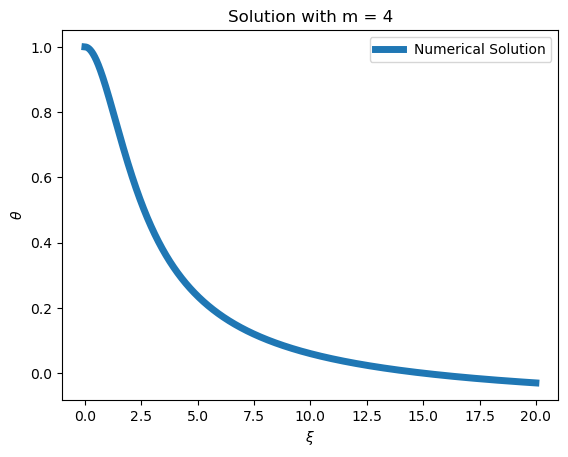

In [80]:
xi_b = 0
xi_e = 20
theta_0 = 1
N= 10000
m=4

xis,thetas = run_Lane_Emden(xi_b,xi_e, theta_0,N,m)
plt.plot(xis,thetas,label= "Numerical Solution", linewidth=5)
plt.title(f"Solution with m = {m}")
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\theta$")
plt.legend()
plt.show()

m: 0 ||  first zero: 2.448


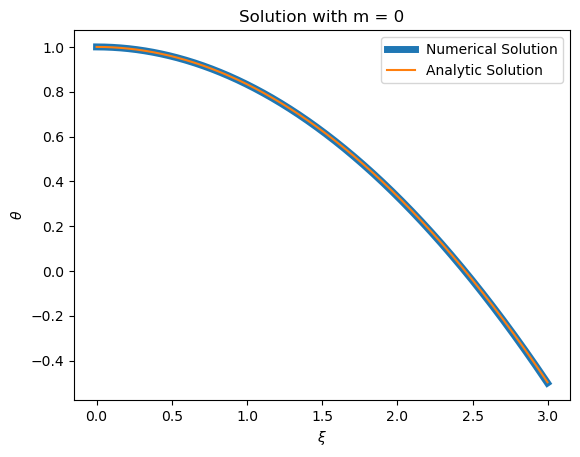

In [68]:
xi_b = 0
xi_e = 3
theta_0 = 1
N= 1000
m=0

xis,thetas = run_Lane_Emden(xi_b,xi_e, theta_0,N,m)
plt.plot(xis,thetas,label= "Numerical Solution", linewidth=5)
plt.plot(xis,1-xis**2/6,label= "Analytic Solution")
plt.title(f"Solution with m = {m}")
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\theta$")
plt.legend()
plt.show()

m: 1 ||  first zero: 3.141


/var/folders/my/2p0xcfbn4z100hsfx3lhh76m0000gp/T/ipykernel_1982/2176671227.py:9: RuntimeWarning: invalid value encountered in divide
  plt.plot(xis,np.sin(xis)/xis,label= "Analytic Solution")


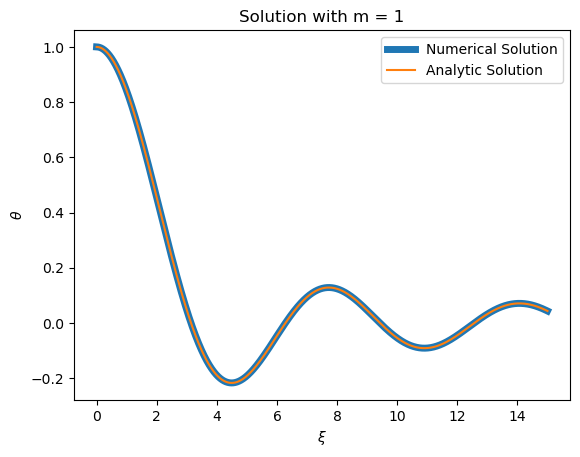

In [44]:
xi_b = 0
xi_e = 15
theta_0 = 1
N= 10000
m=1

xis,thetas = run_Lane_Emden(xi_b,xi_e, theta_0,N,m)
plt.plot(xis,thetas,label= "Numerical Solution", linewidth=5)
plt.plot(xis,np.sin(xis)/xis,label= "Analytic Solution")
plt.title(f"Solution with m = {m}")
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\theta$")
plt.legend()
plt.show()

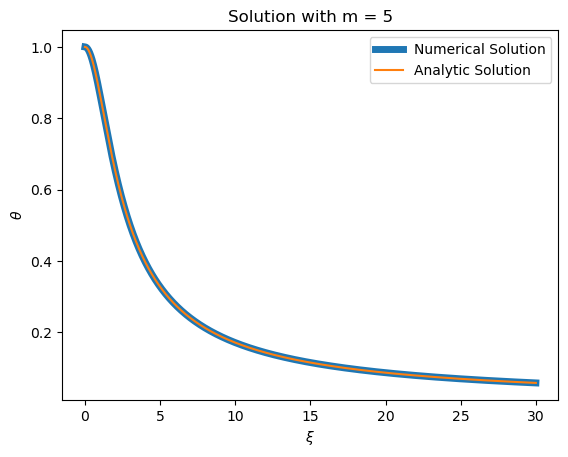

In [34]:
xi_b = 0
xi_e = 30
theta_0 = 1
N= 100000
m=5

xis,thetas = run_Lane_Emden(xi_b,xi_e, theta_0,N,m)
plt.plot(xis,thetas,label= "Numerical Solution", linewidth=5)
plt.plot(xis,(1+(xis**2)/3)**(-1/2),label= "Analytic Solution")
plt.title(f"Solution with m = {m}")
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\theta$")
plt.legend()
plt.show()